### **Importing all the libraries**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
print(tf.__version__)

2.8.2


## **Model**

#### **[LeNet-5] Modified Architecture**
ConvNet --> ConvNet --> BatchNorm --> Pool --> (Dropout) --> ConvNet --> ConvNet --> BatchNorm --> Pool --> (Dropout) --> (Flatten) --> FullyConnected --> BatchNorm --> FullyConnected --> BatchNorm --> FullyConnected --> BatchNorm --> (Dropout) --> Softmax

In [ ]:
def LeNet5(input_shape = (32, 32, 1), classes = 10):
    """
    Implementation of a modified LeNet-5.
    Only those layers with learnable parameters are counted in the layer numbering.
    
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    model = Sequential([
        
    # Layer 1
    Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), kernel_regularizer=l2(0.0005), name = 'convolution_1'),
    
    # Layer 2
    Conv2D(filters = 32, kernel_size = 5, strides = 1, name = 'convolution_2', use_bias=False),
    
    # Layer 3    
    BatchNormalization(name = 'batchnorm_1'),
        
    # -------------------------------- #  
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
    Dropout(0.25, name = 'dropout_1'),
    # -------------------------------- #  
        
    # Layer 3
    Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005), name = 'convolution_3'),
        
    # Layer 4
    Conv2D(filters = 64, kernel_size = 3, strides = 1, name = 'convolution_4', use_bias=False),
        
    # Layer 5
    BatchNormalization(name = 'batchnorm_2'),
        
    # -------------------------------- #  
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
    Dropout(0.25, name = 'dropout_2'),
    Flatten(name = 'flatten'),
    # -------------------------------- #  
        
    # Layer 6
    Dense(units = 256, name = 'fully_connected_1', use_bias=False),
        
    # Layer 7
    BatchNormalization(name = 'batchnorm_3'),
    
    # -------------------------------- #  
    Activation("relu"),
    # -------------------------------- #  
        
    # Layer 8
    Dense(units = 128, name = 'fully_connected_2', use_bias=False),
        
    # Layer 9
    BatchNormalization(name = 'batchnorm_4'),
        
    # -------------------------------- #  
    Activation("relu"),
    # -------------------------------- #  
        
    # Layer 10
    Dense(units = 84, name = 'fully_connected_3', use_bias=False),
        
    # Layer 11
    BatchNormalization(name = 'batchnorm_5'),
        
    # -------------------------------- #  
    Activation("relu"),
    Dropout(0.25, name = 'dropout_3'),
    # -------------------------------- #  

    # Output
    Dense(units = 10, activation = 'softmax', name = 'output')
        
    ])
    
    model._name = 'LeNet5'

    return model

In [ ]:
LeNet5Model = LeNet5(input_shape = (32, 32, 1), classes = 10)

In [ ]:
LeNet5Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### Model Summary

In [ ]:
LeNet5Model.summary()

Model: "LeNet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolution_1 (Conv2D)      (None, 28, 28, 32)        832       
                                                                 
 convolution_2 (Conv2D)      (None, 24, 24, 32)        25600     
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 24, 24, 32)       128       
 tion)                                                           
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 12, 12, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                            

### **Kaggle Data Processing**

#### Upload Datasets

In [ ]:
from google.colab import files
upload = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd
import io

train = pd.read_csv(io.BytesIO(upload['train.csv']))
test = pd.read_csv(io.BytesIO(upload['test.csv']))

# train_url = 'https://github.com/Saidul-M-Khan/MNIST-Digit-Recognizer/blob/main/test.csv?raw=true'
# train = pd.read_csv(train_url)

# test_url = 'https://github.com/Saidul-M-Khan/MNIST-Digit-Recognizer/blob/main/test.csv?raw=true'
# test = pd.read_csv(test_url)

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

# Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

# Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

mean_px = X_val.mean().astype(np.float32)
std_px = X_val.std().astype(np.float32)
X_val = (X_val - mean_px)/(std_px)

mean_px = X_test.mean().astype(np.float32)
std_px = X_test.std().astype(np.float32)
X_test = (X_test - mean_px)/(std_px)

# One-hot encoding the labels
Y_train = to_categorical(Y_train, num_classes = 10)
Y_val = to_categorical(Y_val, num_classes = 10)

In [ ]:
# By using the image generator, we are not generating new data. We are only replacing the exisiting images. 

datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # apply ZCA whitening
        rotation_range = 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_train)

### **Variable Learning Rate**

In [ ]:
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)

#### **Model Training**


In [25]:
history = LeNet5Model.fit(X_train, Y_train, epochs = 30, batch_size = 64, callbacks = [variable_learning_rate], validation_data=(X_val,Y_val))

Epoch 1/30
624/624 [==============================] - 151s 240ms/step - loss: 0.2552 - accuracy: 0.9334 - val_loss: 0.0739 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 2/30
624/624 [==============================] - 144s 231ms/step - loss: 0.1000 - accuracy: 0.9763 - val_loss: 0.0592 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 3/30
624/624 [==============================] - 148s 237ms/step - loss: 0.0756 - accuracy: 0.9828 - val_loss: 0.0688 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 4/30
624/624 [==============================] - 144s 231ms/step - loss: 0.0642 - accuracy: 0.9847 - val_loss: 0.0504 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 5/30
624/624 [==============================] - 143s 229ms/step - loss: 0.0574 - accuracy: 0.9868 - val_loss: 0.0508 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 6/30
624/624 [==============================] - 139s 223ms/step - loss: 0.0526 - accuracy: 0.9876 - val_loss: 0.0401 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 7/30
624/624 [==========================

### **Training and Validation Accuracy Graph**

<Figure size 432x288 with 0 Axes>

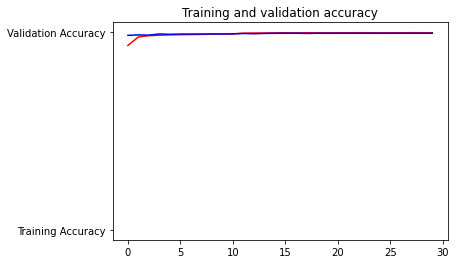

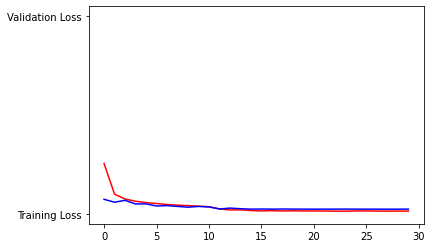

<Figure size 432x288 with 0 Axes>

In [31]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

## **Results**

* **epochs - 30**

* **loss - 0.0112**

* **train_accuracy - 0.9982**

* **val_loss - 0.0192**

* **val_accuracy - 0.9962**

* **Highest Dev Set Accuracy Obtained - 99.62%**
